In [2]:
import sklearn as skl
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd

## this is markdown

In [5]:
code = 2
# im commenting

In [6]:
code

2

# Importing Data

In [9]:
data = h5py.File('/Users/kategroschner/Downloads/Chiral_D_2018_10_31_FilteredStack.emd','r')

In [10]:
# if we try to get the subparts of keys without using list it just tells us the data type of data.keys()
data.keys()

KeysView(<HDF5 file "Chiral_D_2018_10_31_FilteredStack.emd" (mode r)>)

In [11]:
# if we use list though it will tell us the data groups
list(data.keys())

['comments', 'data', 'microscope', 'sample', 'user']

In [12]:
subdata = data['data']

In [14]:
#still data groups within subdata
list(subdata.keys())

['Masked Particles', 'Masks Only', 'Particle Images with Background']

In [15]:
# we want to get the masked particles
particles = subdata['Masked Particles']

In [16]:
# rifling through more subparts
list(particles.keys())


['data', 'dim1', 'dim2', 'dim3']

In [17]:
subparticles = particles['data']

In [18]:
# turn subparticles into a numpy array
subparticles_matrix = subparticles[:,:,:]

In [19]:
#check its a numpy array
type(subparticles_matrix)

numpy.ndarray

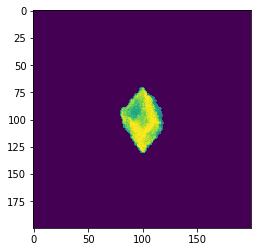

In [20]:
#plotting using matplotlib.pyplot
plt.imshow(subparticles_matrix[0])

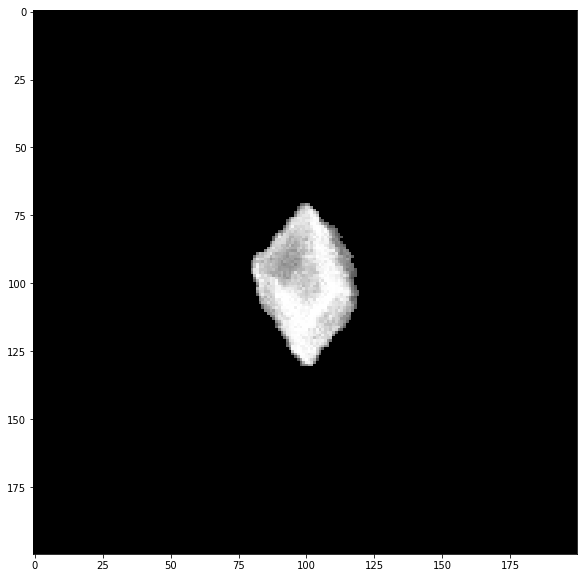

In [21]:
#do that but bigger
plt.figure(figsize=(10,10))
plt.imshow(subparticles_matrix[0],cmap='gray')

In [22]:
# get the label data
labels = np.loadtxt('/Users/kategroschner/Downloads/Chiral_D_ManualValues_2018_10_31.csv',delimiter=',')

In [23]:
#figure out the number of each label
count_l = 0
count_r = 0
for l in labels:
    if l == 4:
        count_l += 1
    elif l == 6:
        count_r += 1
print('left: ', count_l, 'right: ', count_r)

count_g = 0
count_idk = 0
for l in labels:
    if l == 0:
        count_g += 1
    elif l == 5:
        count_idk += 1
print('garbage: ', count_g, 'idk: ', count_idk)

left:  90 right:  97
garbage:  767 idk:  46


# Balancing the dataset

In [ ]:
def balance(images, labels, min_label_num):
    final_image = []
    final_labels = []
    count_left = 0
    count_right = 0
    count_garbage = 0
    count_idk = 0
    for idx, l in enumerate(labels):
        if label == 4:
            if count_left < min_num_labels:
                final_image.append(images[idx])
                final_labels.append(l)
    # HI PIPER HAVE FUN FINISHING THIS :D

# Machine Learning

In [ ]:
# DOING MACHINE LEARNING


def train_random_forest(X_train, Y_train, nestimators = 50,crit='gini',max_feat='auto'):
    """function that takes in the training feature set and training labels and trains a radnom forest with 
    n estimators given by nestimators"""
    classifier = RandomForestClassifier(n_estimators= nestimators,criterion= crit,max_features=max_feat)
    classifier.fit(X_train, Y_train)
    return classifier

def cross_val_stratified(X,Y,model,nsplit):
    """runs stratified k-fold cross validation where nsplit specifies the number of splits
    and returns the mean and standard deviation of the cross validation score. Based on the code shown in 
    class."""
    cv = StratifiedKFold(n_splits=nsplit)
    scores = cross_val_score(model, X, Y, cv=cv, n_jobs=-1)
    print("mean: {:3f}, stdev: {:3f}".format(
        np.mean(scores), np.std(scores)))

def plot_confusion_matrix(Y, Y_pred, labels):
    """Creates a confusion matrix for the different classes given a set of features, true labels, the dataset
    and the desired trained classfier"""
    cfm = metrics.confusion_matrix(Y, Y_pred, labels=labels)
    df_cfm = pd.DataFrame(data = cfm, columns=labels, index=labels)
    plt.subplots(figsize=(5,5))
    ax = sns.heatmap(df_cfm, vmax = 90, annot=True, fmt="d",cmap='rainbow')



In [24]:
images = subparticles_matrix

In [26]:
images[0].shape

(200, 200)

In [25]:
images[0].flatten().shape

(40000,)

In [27]:
#shape all the images into 1d vectors
pics_1d = []
for img in images:
    pics_1d.append(img.flatten())
pics_1d = np.array(pics_1d) #do this to make it easy to interact with

pics_1d.shape

(5051, 40000)

In [28]:
#doing this without balancing and defining the features to be the pixels of each image
model = train_random_forest(pics_1d[0:100,:],labels[0:100]) #train on 0th to 99th element

In [30]:
predicted = model.predict(pics_1d[100:200])
#getting the percent accurate
metrics.accuracy_score(labels[100:200],predicted)*100

74.0

Text(0.5,24,'Predicted Label')

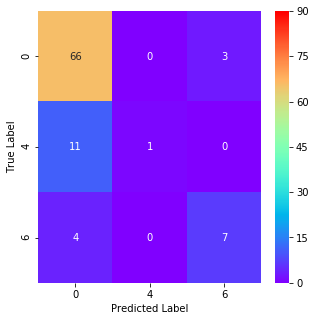

In [31]:
plot_confusion_matrix(labels[100:200],predicted,[0, 4, 6])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [3]:
segmentation = h5py.File('/Users/kategroschner/Downloads/Chiral_D_TEST_2Kx2K_ProbMaps_HDF5.h5','r')

In [33]:
list(segmentation.keys())

['__DATA_TYPES__', 't0']

In [4]:
prob1 = segmentation['/t0/channel0'][:]
prob2 = segmentation['/t0/channel1'][:]
prob3 = segmentation['/t0/channel2'][:]

In [5]:
prob1.shape

(2000, 2000)

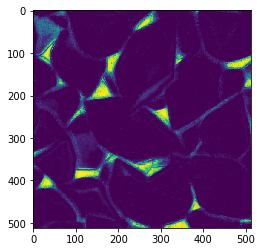

In [6]:
plt.imshow(prob1[:512,:512])

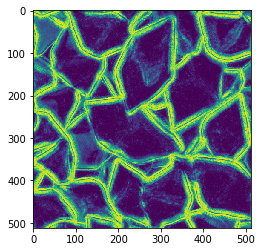

In [7]:
plt.imshow(prob2[:512,:512])

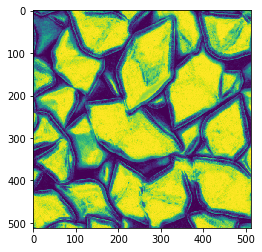

In [8]:
plt.imshow(prob3[:512,:512])

In [11]:
imgname1 = '/Users/kategroschner/Downloads/Chiral_D_TEST_2Kx2K_ProbMaps_HDF5.h5' # D_2019_02_05
imgname2 = '/Users/kategroschner/Downloads/Chiral_D_TESTIMAGE_HDF5_2Kx2K.h5' # D_2019_02_05

In [12]:
with h5py.File(imgname1, 'r') as imagefile:
    Checkimage = imagefile['/t0/channel0'][:]
    
ProbMaps = np.zeros((3, np.shape(Checkimage)[0], np.shape(Checkimage)[1]), dtype = Checkimage.dtype)

with h5py.File(imgname1, 'r') as imagefile:
    ProbMaps[0, :, :] = imagefile['/t0/channel0'][:]
    ProbMaps[1, :, :] = imagefile['/t0/channel1'][:]
    ProbMaps[2, :, :] = imagefile['/t0/channel2'][:]

In [14]:
with h5py.File(imgname2, 'r') as imagefile:
    OGimage = imagefile['/t0/channel0'][:]

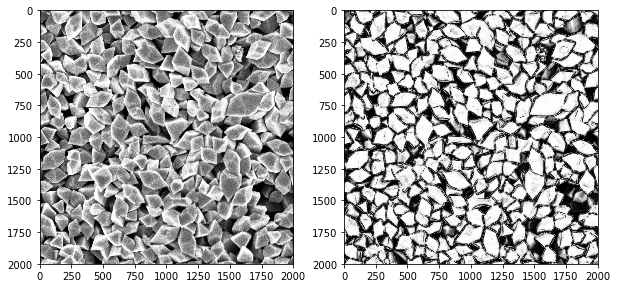

In [17]:
fg1,(ax1, ax2) = plt.subplots(1, 2, num = 1, figsize=(10, 5))
ax1.imshow(OGimage, cmap = "Greys_r")
ax2im = ax2.imshow(ProbMaps[2], cmap = "Greys_r")

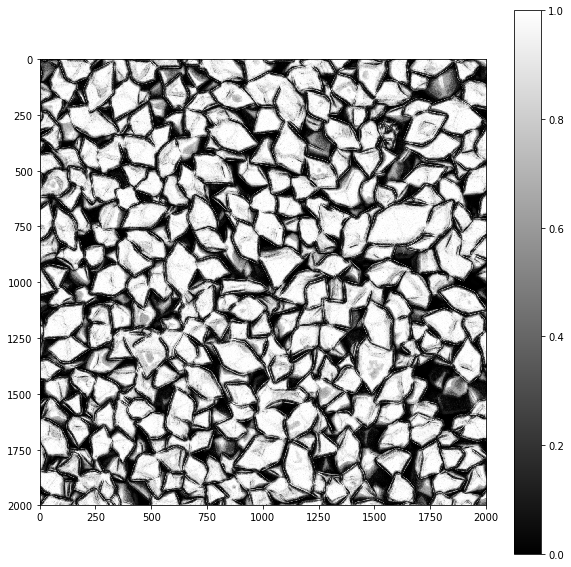

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(ProbMaps[2],cmap='gray')
plt.colorbar()

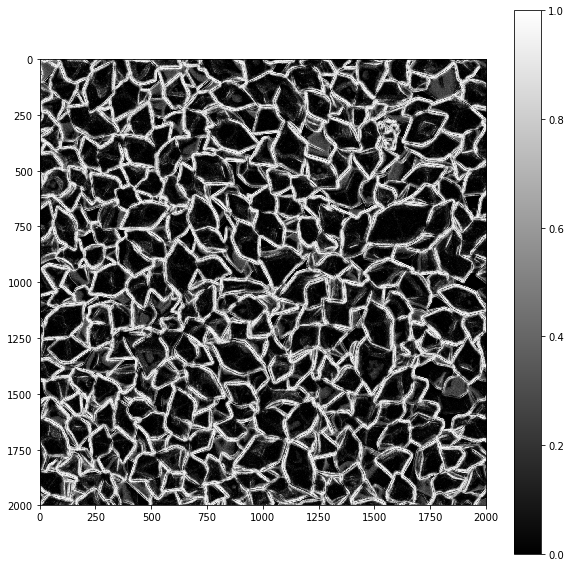

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(ProbMaps[1],cmap='gray')
plt.colorbar()

In [19]:
test = ProbMaps[2].copy()

In [20]:
test[test<0.6]=0

In [22]:
test[test>=0.6] = 1

In [44]:
edges = ProbMaps[1].copy()

In [45]:
edges[edges<0.8] = 0
edges[edges>= 0.8] = 1

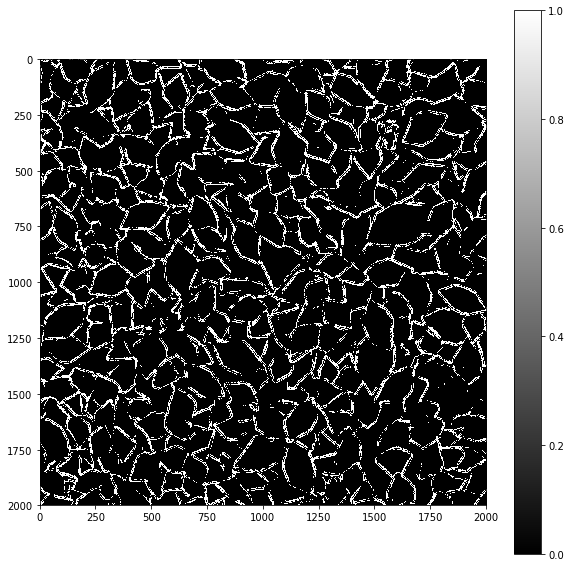

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(edges,cmap='gray')
plt.colorbar()

In [49]:
edges2 = morph.closing(morph.opening(morph.closing(edges.copy(),morph.disk(5)),selem),selem)

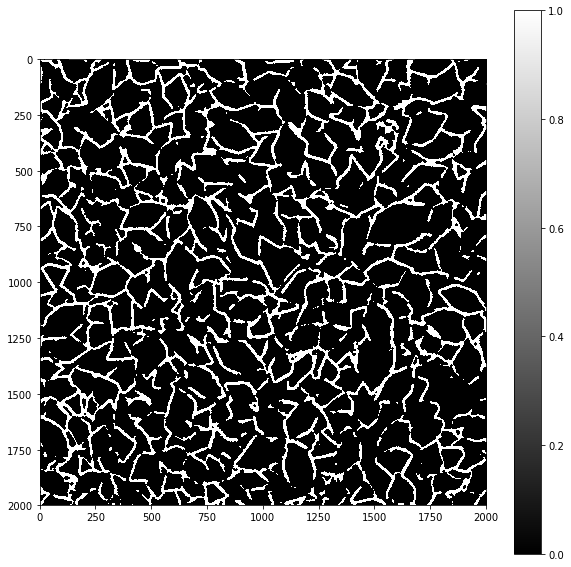

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(edges2,cmap='gray')
plt.colorbar()

In [56]:
edges3 = morph.closing(morph.dilation(edges.copy()),morph.disk(5))

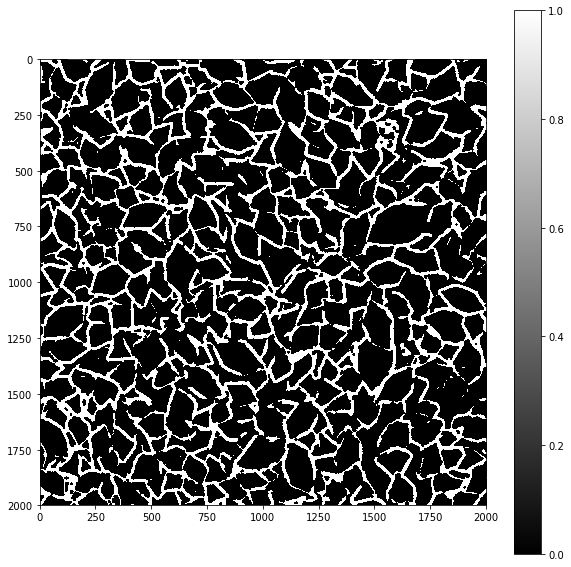

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(edges3,cmap='gray')
plt.colorbar()

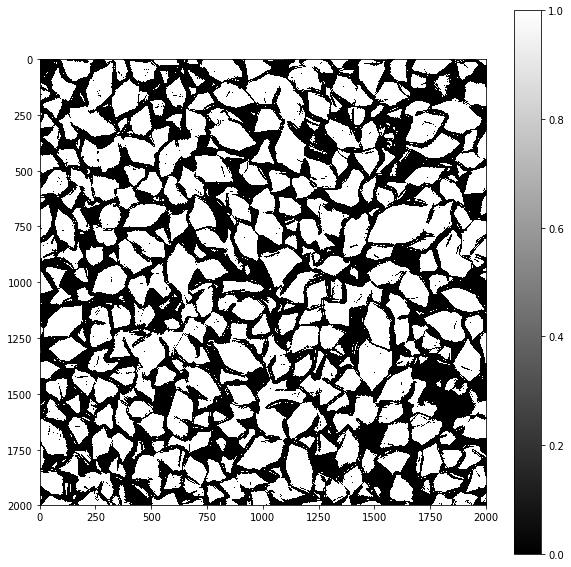

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(test,cmap='gray')
plt.colorbar()

In [24]:
from skimage import morphology as morph

In [25]:
selem = morph.disk(2)

In [26]:
test2 = morph.binary_erosion(test,selem)

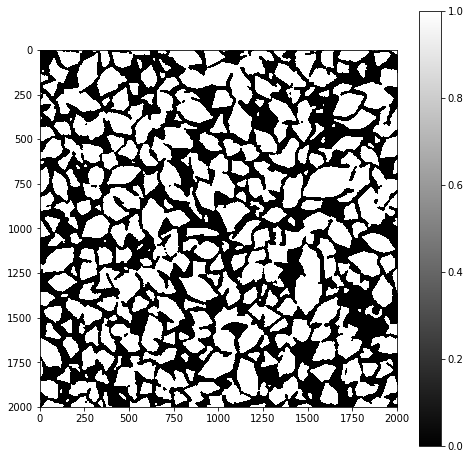

In [35]:
plt.figure(figsize=(8,8))morph.opening(morph.clo
plt.imshow(morph.closing(morph.opening(test,selem),morph.disk(5)),morph.disk(5)),cmap='gray')
plt.colorbar()

In [58]:
mask = morph.opening(morph.closing(morph.opening(test,selem),morph.disk(5)),morph.disk(5))

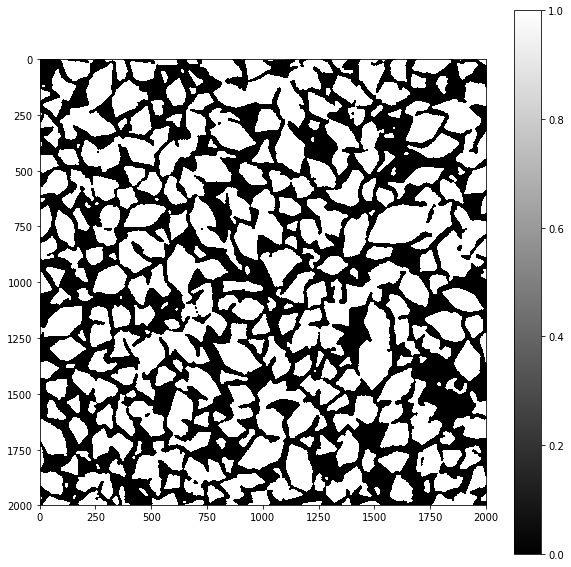

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(mask,cmap='gray')
plt.colorbar()

In [68]:
edges4 = edges3.copy()

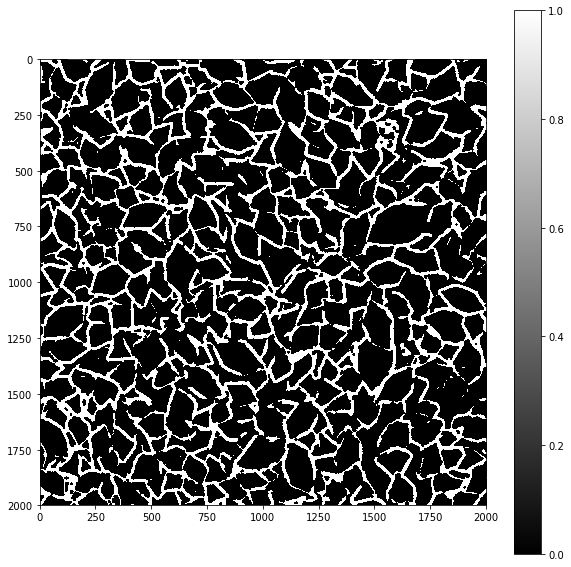

In [69]:
plt.figure(figsize=(10,10))
plt.imshow(edges4,cmap='gray')
plt.colorbar()

In [70]:
mask2 = mask-edges4

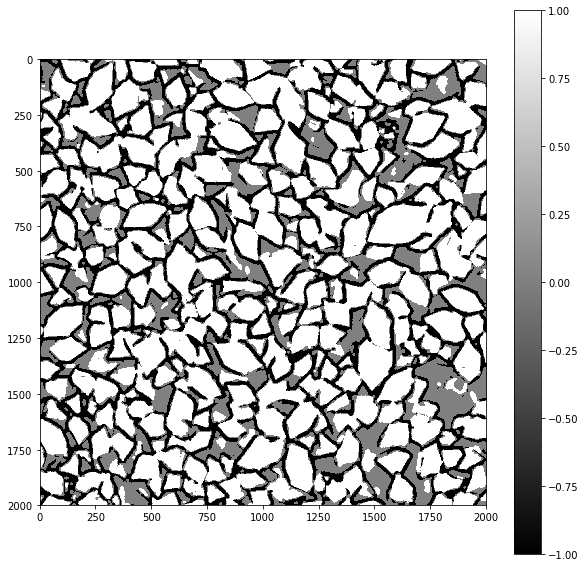

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(mask2,cmap='gray')
plt.colorbar()

In [72]:
mask2[mask2<0] = 0

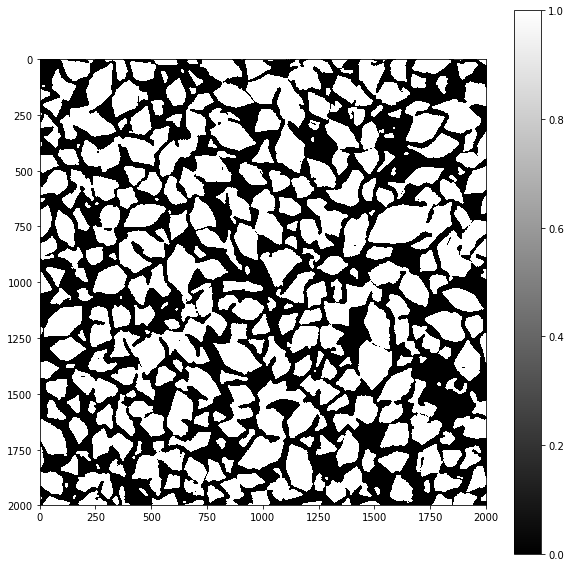

In [73]:
plt.figure(figsize=(10,10))
plt.imshow(mask2,cmap='gray')
plt.colorbar()

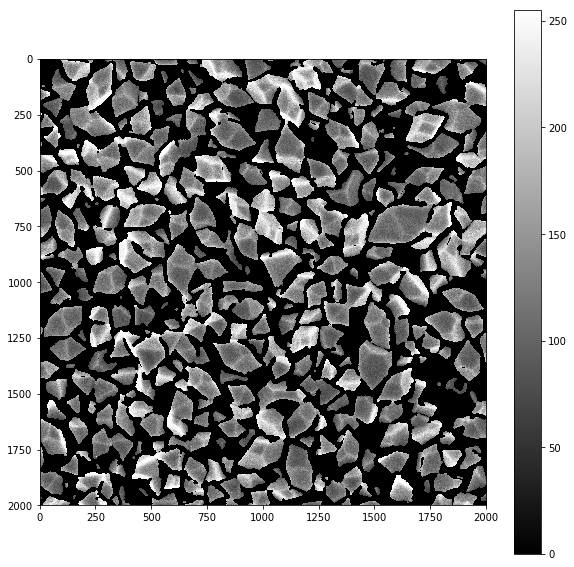

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(OGimage*mask2,cmap='gray')
plt.colorbar()

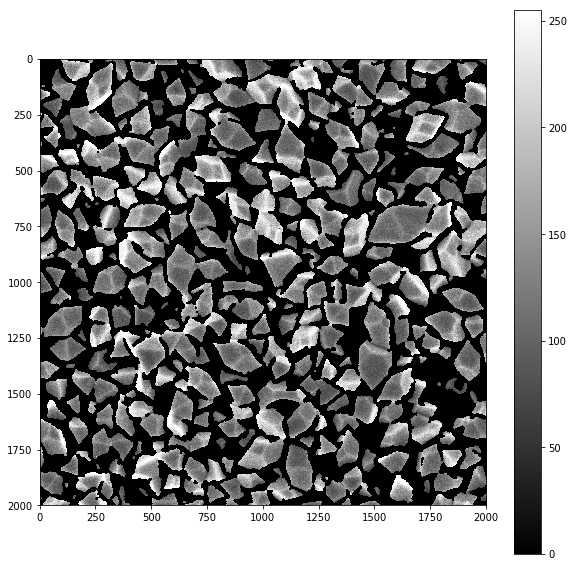

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(OGimage*mask,cmap='gray')
plt.colorbar()

In [76]:
OGimage.shape

(2000, 2000)

In [79]:
def slidding_window(image, mask, windowSize, step):
    numWindows = (image.shape[0]-windowSize)//step
    window_stack = []
    mask_stack = []
    for i in np.arange(0,numWindows):
        for j in np.arange(0,numWindows):
            window_stack.append(image[i*step:i*step+windowSize,j*step:j*step+windowSize])
            mask_stack.append(mask[i*step:i*step+windowSize,j*step:j*step+windowSize])
    window_stack = np.array(window_stack)
    mask_stack = np.array(mask_stack)
    return window_stack, mask_stack

In [102]:
image_stack, mask_stack = slidding_window(filt_image,mask,400,25)

In [89]:
image_stack.shape

(4096, 400, 400)

In [109]:
mask_stack = mask_stack.astype('int')

In [103]:
q = h5py.File('chiral_image_stack.h5','w')
q.create_dataset('stack',data = image_stack)
q.close()

In [111]:
q = h5py.File('chiral_mask_stack.h5','w')
q.create_dataset('masks',data = mask_stack)
q.close()

In [112]:
mask_stack.shape

(4096, 400, 400)

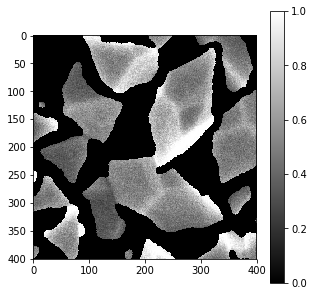

In [105]:
plt.figure(figsize=(5,5))
plt.imshow(image_stack[0]*mask_stack[0],cmap='gray')
plt.colorbar()

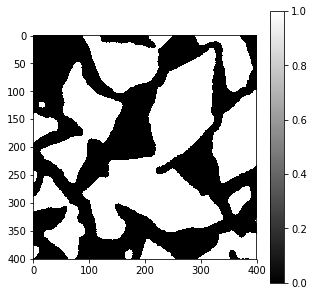

In [110]:
plt.figure(figsize=(5,5))
plt.imshow(mask_stack[0],cmap='gray')
plt.colorbar()

In [95]:
import sys
sys.path.append('/Users/kategroschner/Documents/pyNanoFind/utilities/')

In [96]:
import realDataProcess as rdp

In [97]:
filt_image = rdp.median_filter(OGimage.copy())

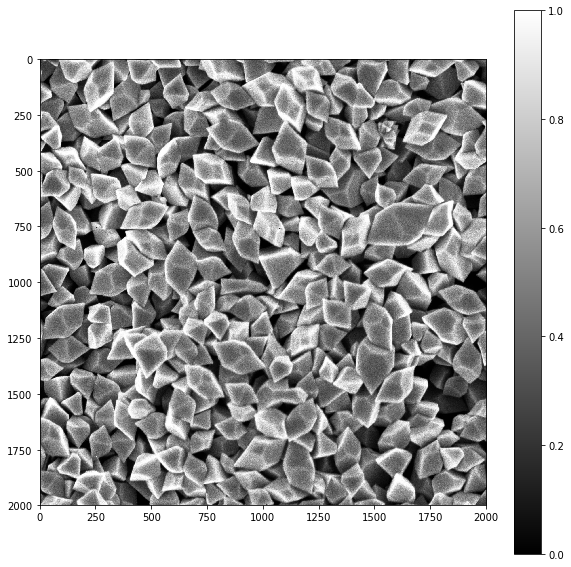

In [99]:
rdp.imm(filt_image,(2000,2000))

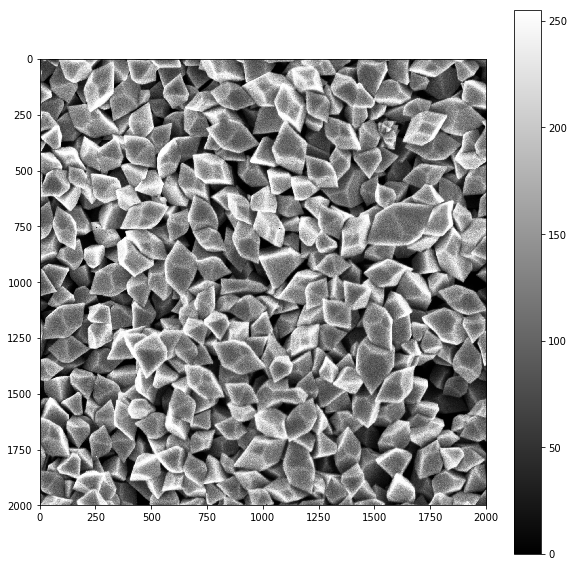

In [101]:
rdp.imm(OGimage,(2000,2000))

In [2]:
500*16

8000